Primeiramente, garanta que ao abrir o jupyter voce o esteja fazendo com o environment em que ha os pacotes necessarios. Se voce instalar algum pacore apos ter inicializado um jupyter notebook, voce terah de reiniciar o kernel do jupyter para que os pacotes sejam vistos ou atualizados.

 Para abrir, ler arquivos FITS e plotar imagens, os pacotes basicos sao:
- numpy
- matplotlib
- healpy
- astropy

Informacoes gerais sobre arquivos FITS voce podera encontrar em 
> https://learn.astropy.org/tutorials/FITS-cubes.html

> https://spectral-cube.readthedocs.io/en/latest/

Mesmo que o Healpy/Healpix possua funcoes nativas que leem fits, eu procurarei ser um pouco mais geral. Isso pois, as funcoes do healpy assumem certas estruturas do arquivo FITS.

Aqui eu nao me focarei em como mexer com um jupyter notebook. Para isso, o leitor podera procurar blogs e ter a pro-atividade investigativa que nos cabe em tais situacoes.

Para carregar os pacotes, rode a box abaixo:

In [8]:
%matplotlib inline
import os,sys
import numpy as np
import astropy.io.fits as fits
import healpy as hp
from copy import deepcopy as dcopy #faz a copias literais, e nao de apontamento

Estarei usando um arquivo que eu mesmo gerei. Isso sera somente um exemplo, portanto, as ideias aqui empregadas podem ser adaptadas aos demais casos

Como variavel *dirpath* cito o caminho em linux ate o diretorio do arquivo que lidaremos, e *filename* o nome do arquivo

In [4]:
dirpath  = '/media/BINGODATA1/ComponentSeparation/building_dataset/dataset/FG256'
os.listdir(dirpath)

['FG_I_256_980mhz1260mhz_100bins_full_nonfrps_nch100_L0.fits',
 'FG_U_256_980mhz1260mhz_30bins_full_L0.fits',
 'FG_I_256_980mhz1260mhz_30bins_full_L0.fits',
 'FG_I_256_1050mhz1420mhz_37bins_full_nonfrps_L0.fits',
 'FG_I_256_980mhz1260mhz_50bins_full_nonfrps_nch50_L0.fits',
 'FG_I_256_980mhz1260mhz_10bins_full_nonfrps_nch10_L0.fits',
 'FG_I_256_350mhz1050mhz_70bins_full_nonfrps_L0.fits',
 'FG_Q_256_980mhz1260mhz_30bins_full_L0.fits',
 'FG_I_256_980mhz1260mhz_30bins_full_nonfrps_nch30_L0.fits',
 'FG_I_256_980mhz1260mhz_30bins_full_nonfrps_L0.fits',
 'FG_I_256_980mhz1260mhz_70bins_full_nonfrps_nch70_L0.fits',
 '.ipynb_checkpoints']

In [6]:
filename = 'FG_I_256_980mhz1260mhz_30bins_full_L0.fits'
#caminho (path) que determina a localizacao do arquivo no sistema
filepath = os.path.join(dirpath, filename)
#Arquivo existe?
os.path.isfile(filepath)

True

aqui usarei o astropy atraves da funcao fits para abrir o arquivo acima

In [9]:
with fits.open(filepath) as h:
    hdul = dcopy(h) #sem deepcopy nao pode dar conflito, pois, uma vez que lida com o apontamento, apos o fits ser fechado, o apontamento se perde. Entao precisamos da copia literal

Agora, podemos ver como esse FITS esta estruturado. Arquivos fits sao como gavetas de uma comoda, em que ha as pecas/dados que guardamos mas tambem ha do que guardamos.
Podemos guardar diferentes dados em diferentes gavetas. As gavetas chamamos de HDUs. No arquivo abaixo ha dois HDUs (duas gavetas)

In [10]:
hdul.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   (31,)   float64   
  1  MULTIMAPS     1 ImageHDU        22   (786432, 30)   float64   


Os HDUs podem ser acessados como umarray, mas chamar as informacoes seria como um pandas dictionary. Entao, se quero o primeiro HDU, uso hdul[0]. Para o segund, hdul[1], e assim sucessivamente

As informacoes dos dados sao os metadados e estarao alocadas no *header*. Por ora, nao se preocupe tanto com tais dados

In [12]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                   31                                                  
EXTEND  =                    T                                                  
FREQ_MIN=                  980                                                  
FREQ_MAX=                 1260                                                  
NBANDS  =                   30                                                  
COMMENT PRIMARY HDU CONTAIN THE REDSHIFT VECTOR                                 

Para acessar os dados usamo a extensao *data*

In [13]:
hdul[0].data

array([ 980.  ,  989.33,  998.67, 1008.  , 1017.33, 1026.67, 1036.  ,
       1045.33, 1054.67, 1064.  , 1073.33, 1082.67, 1092.  , 1101.33,
       1110.67, 1120.  , 1129.33, 1138.67, 1148.  , 1157.33, 1166.67,
       1176.  , 1185.33, 1194.67, 1204.  , 1213.33, 1222.67, 1232.  ,
       1241.33, 1250.67, 1260.  ])

Aqui, esses dados nao sao mapas. Como pode ser visto no comentario do header, ha o  "redshift vector"  associado aos dados. Isto eh, uma vez que temos varios mapas em radiofrequencia e cada mapa eh referente a uma faixa de frequencia, e por esta estar associada a uma faixa de frequencia, temos as frequencias acima. Na verdade, deveria estar escrito "frequency vector", mas nao importa aqui. O mais importante eh entender a estrutura do arquivo.

Agora podemos ver o caso do segundo HDU.

In [16]:
hdul[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =               786432                                                  
NAXIS2  =                   30                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
FIELD   = 'FG      '                                                            
STOKES  = 'I       '           / mk                                             
NSIDE   =                  256                                                  
FREQ_MIN=                980.0 / in MHz                                         
FREQ_MAX=               1260.0 / in MHz                                         
NBINS   =                   

In [17]:
hdul[1].data

array([[1680.19322749, 1580.77427436, 1617.97776627, ..., 1638.83031486,
        1531.97833351, 1674.61318903],
       [1634.64643283, 1538.26977119, 1573.29273181, ..., 1593.7052788 ,
        1491.63198497, 1629.29535213],
       [1590.75372636, 1497.30302649, 1530.24822627, ..., 1550.2326608 ,
        1452.72225649, 1585.61802379],
       ...,
       [ 866.81587656,  820.51111424,  823.51432538, ...,  835.77094808,
         805.91526405,  864.42614851],
       [ 848.15208628,  803.02447603,  805.39879751, ...,  817.43693013,
         789.08008006,  845.81211724],
       [ 830.02877417,  786.04162558,  787.81456803, ...,  799.63947055,
         772.72251094,  827.7361553 ]])

Vide que o dado acima eh muito maior. Na verdade ele eh uma matriz; ou, de forma mais precisa, um array de dimensao 2. Para ver isso podemos usar a funcao shape

In [18]:
hdul[1].data.shape

(30, 786432)

ou seja, sao 30 linhas e 786432 colunas. As linhas sao os mapas e as colunas os pixels. Logo, para pegar somente um mapa, digamos que seja o primeiro (i=0), fazemos

In [23]:
imap = 0
hdul[1].data[imap,:]

array([1680.19322749, 1580.77427436, 1617.97776627, ..., 1638.83031486,
       1531.97833351, 1674.61318903])

In [20]:
# ou simplesmente,
hdul[1].data[0]

array([1680.19322749, 1580.77427436, 1617.97776627, ..., 1638.83031486,
       1531.97833351, 1674.61318903])

para um pixel em diferentes faixas de frequencias (canais de frequencias)

In [24]:
ipixel = 0
hdul[1].data[:,ipixel]

array([1680.19322749, 1634.64643283, 1590.75372636, 1548.44035278,
       1507.63523527, 1468.27152031, 1430.28568547, 1393.61740616,
       1358.20981655, 1324.00886918, 1290.96312372, 1259.02394697,
       1228.14511178, 1198.28257367, 1169.39468832, 1141.44179892,
       1114.38589303, 1088.19117558, 1062.82349311, 1038.24998676,
       1014.43979154,  991.36327959,  968.99211212,  947.29940035,
        926.25946728,  905.84756828,  886.0405442 ,  866.81587656,
        848.15208628,  830.02877417])

Agora, podemos plotar a imagem do mapa usando o pacote healpy

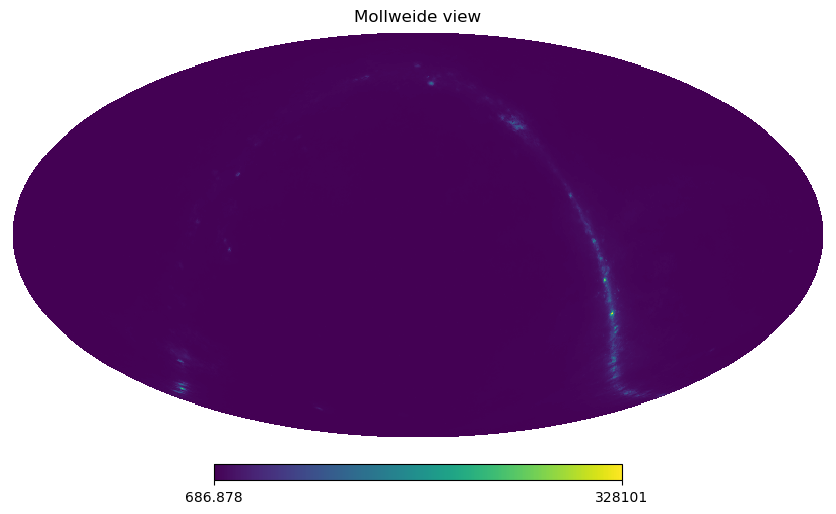

In [25]:
# OBS: nao use o nome map para variavel mapa. map eh uma funcao nativa do python
map_ = hdul[1].data[imap,:]
hp.mollview(map_)

Eh possivel editar a imagem. Funcoes e edicoes podem serem vistas no site do healpy ().

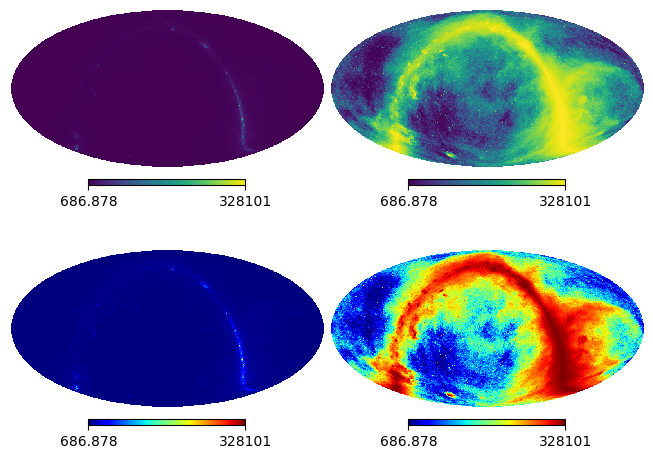

In [31]:
map_ = hdul[1].data[imap,:]
hp.mollview(map_, norm = None  , cmap = 'viridis', sub=221, title=None)
hp.mollview(map_, norm = 'hist', cmap = 'viridis', sub=222, title=None)
hp.mollview(map_, norm = None  , cmap = 'jet'    , sub=223, title=None)
hp.mollview(map_, norm = 'hist', cmap = 'jet'    , sub=224, title=None)

#### HIDE

Os dados do HIDE estao sendo - ate o momento - exportados com um padrao standard do healpy, que eh o de colocar o cubo dentro do HDU Primary (primeiro HDU)
Como exemplo, peguemos um arquivo fits do HIDE que estah no seguinte diretorio

In [97]:
dirpath = "/media/BINGODATA1/ComponentSeparation/HS/data/fits_231218_azalt5"

In [98]:
os.listdir(dirpath)

['hitmap_noiseless_ch27_nch30_1d.fits',
 'hitmap_noiseless_ch15_nch30_1d_zoom.png',
 'hitmap_noiseless_ch27_nch30_1d.png',
 'hitmap_noiseless_ch14_nch30_1d.png',
 'hitmap_noiseless_ch2_nch30_1d_zoom.png',
 'hitmap_noiseless_ch16_nch30_1d_strip.png',
 'naivemap_noiseless_ch5_nch30_1d.png',
 'naivemap_noiseless_ch26_nch30_1d_strip.png',
 'naivemap_noiseless_ch1_nch30_1d_strip.png',
 'hitmap_noiseless_ch15_nch30_1d.png',
 'naivemap_noiseless_ch29_nch30_1d_zoom.png',
 'hitmap_noiseless_ch14_nch30_1d_zoom.png',
 'hitmap_noiseless_ch0_nch30_1d_zoom.png',
 'naivemap_noiseless_ch0_nch30_1d.fits',
 'naivemap_noiseless_ch11_nch30_1d.fits',
 'naivemap_noiseless_ch10_nch30_1d_zoom.png',
 'naivemap_noiseless_ch20_nch30_1d_strip.png',
 'naivemap_noiseless_ch21_nch30_1d.fits',
 'naivemap_noiseless_ch17_nch30_1d_strip.png',
 'hitmap_noiseless_ch9_nch30_1d_strip.png',
 'naivemap_noiseless_ch7_nch30_1d_zoom.png',
 'hitmap_noiseless_ch18_nch30_1d.png',
 'hitmap_noiseless_ch22_nch30_1d_strip.png',
 'hitma

In [99]:
#E tomemos o resultado da canal de freq 27
filename = 'naivemap_noiseless_ch0_nch30_1d.fits'
filepath = os.path.join(dirpath, filename)

In [100]:
with fits.open(filepath) as h:
    hdul = dcopy(h) 

In [101]:
hdul.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   (786432,)   float64   


In [102]:
hdul[0].data.shape

(786432,)

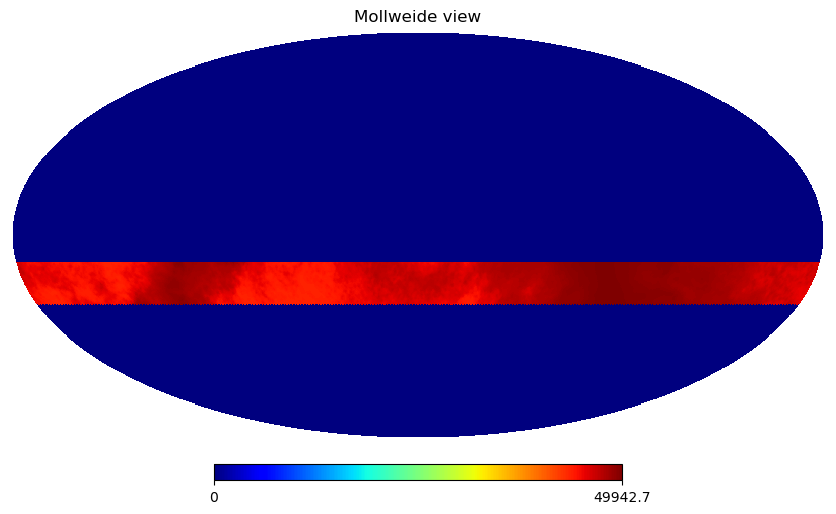

In [103]:
# OBS: nao use o nome map para variavel mapa. map eh uma funcao nativa do python
naive = hdul[0].data
hp.mollview(naive, norm='hist', cmap='jet')

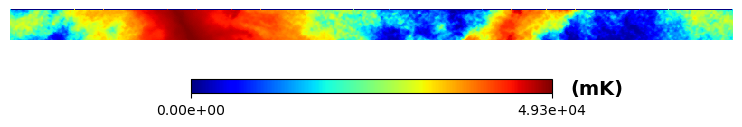

In [104]:
Dec_min = -25 - 0.1
Dec_max = -10 + 0.1
Ra_min  = 0
Ra_max  = 360
CMAP    = "jet"
hp.cartview(naive, norm="hist", latra=[Dec_min,Dec_max], lonra=[Ra_min,Ra_max], cmap='jet', title=None,   format='%.2e', unit=r'(mK)')

Para melhor visualizar a projecao mollview podemos usar o hp.UNSEEN. para tal, tomarei o hitmap com as posicoes em que nao ha contagem (hit)

In [105]:
filename = 'hitmap_noiseless_ch0_nch30_1d.fits'
filepath = os.path.join(dirpath, filename)
with fits.open(filepath) as h:
    hdul = dcopy(h) 
hit = hdul[0].data
hit.shape

(786432,)

In [106]:
index = np.where(hit<=0)[0] #pegar os pixels onde nao ha dado
naive[index]=hp.UNSEEN #onde nao ha dado, nao assuma informacao

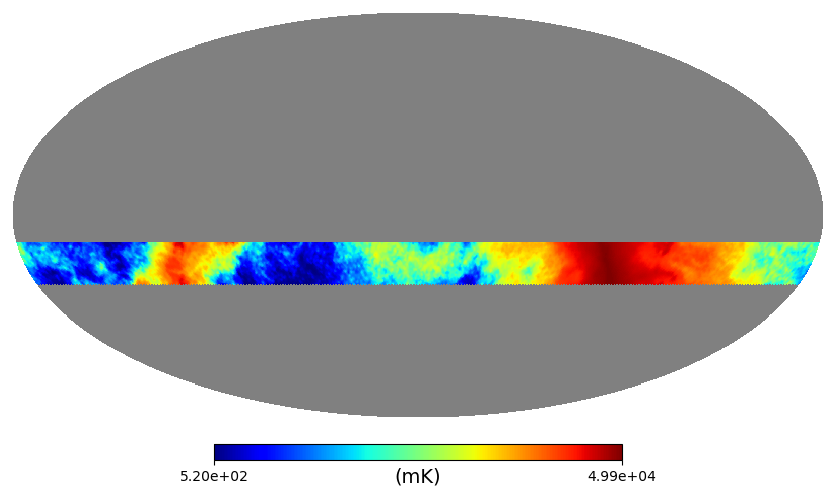

In [107]:
hp.mollview(naive, norm='hist', cmap='jet',title=None,   format='%.2e', unit=r'(mK)')

Agora, pegarei o mapa original

In [108]:
dirpath = '/media/BINGODATA1/ComponentSeparation/MAPS/HS'
filename= 'sky_960mhz1260mhz_nch30_mk_fullsky_nonoise_nobeam.fits'

filepath = os.path.join(dirpath, filename)
with fits.open(filepath) as h:
    hdul = dcopy(h) 
input = hdul[0].data
input.shape

(30, 786432)

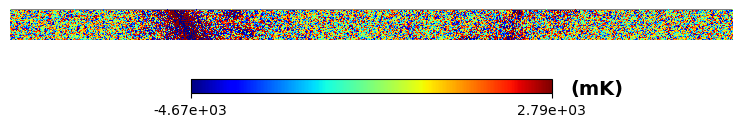

In [110]:
Dec_min = -25 - 0.1
Dec_max = -10 + 0.1
Ra_min  = 0
Ra_max  = 360
CMAP    = "jet"
hp.cartview(naive - input[0], norm="hist", latra=[Dec_min,Dec_max], lonra=[Ra_min,Ra_max], cmap='jet', title=None,   format='%.2e', unit=r'(mK)')

Como o mapa apos sair do hide esta convoluido com o feixe de 40arcmin, precisamos levar isso em consideracao para comparar corretamente.
Ou seja, devemos convoluir o mapa de input tambem

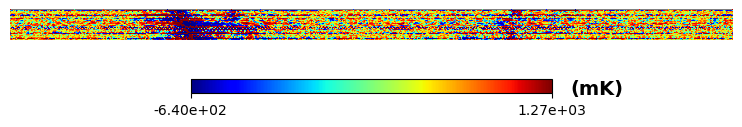

In [112]:
input_convolved =hp.smoothing( input[0], pol=False, fwhm=np.radians(40/60))

Dec_min = -25 - 0.1
Dec_max = -10 + 0.1
Ra_min  = 0
Ra_max  = 360
CMAP    = "jet"
hp.cartview(naive - input_convolved, norm="hist", latra=[Dec_min,Dec_max], lonra=[Ra_min,Ra_max], cmap='jet', title=None,   format='%.2e', unit=r'(mK)')